<a href="https://colab.research.google.com/github/eclipseeyo/practiceML/blob/main/TimeSeries_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Начало работы с временными рядами

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Зарплата сотрудников некоторой фирмы в зависимости от времени.

In [ ]:
ts_wage = pd.read_csv(
    'https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/monthly_wage.csv',
    sep=';')

ts_wage.head()

,Month,Real wage
0,1993-01,100.00
1,1993-02,99.04
2,1993-03,101.77
3,1993-04,110.05
4,1993-05,115.47


In [ ]:
ts_wage.dtypes

,0
Month,object
Real wage,float64


In [ ]:
ts_wage = pd.read_csv(
    'https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/monthly_wage.csv',
    sep=';',
    decimal='.',
    parse_dates=True,
    index_col='Month'
    )

ts_wage.head()

,Real wage
Month,
1993-01-01,100.00
1993-02-01,99.04
1993-03-01,101.77
1993-04-01,110.05
1993-05-01,115.47


In [ ]:
ts_wage.index.names=['Timestamp']
ts_wage = ts_wage.sort_index()

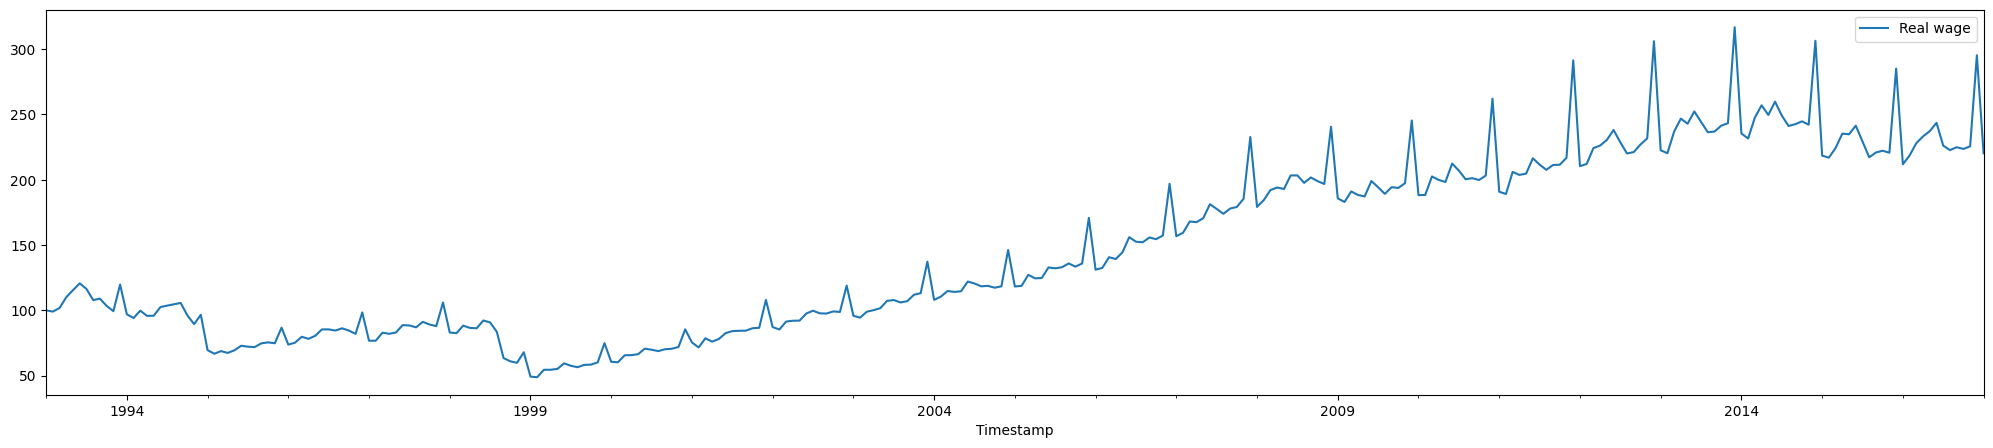

In [ ]:
ts_wage.plot(figsize = (25,5));

## Компоненты временного ряда

* Тренд (trend) - плавное долгосрочное изменение значений ряда
* Сезонность (seasonality) - сезонные колебания ряда
* Шум (noise) - шумовая/случайная компонента ряда

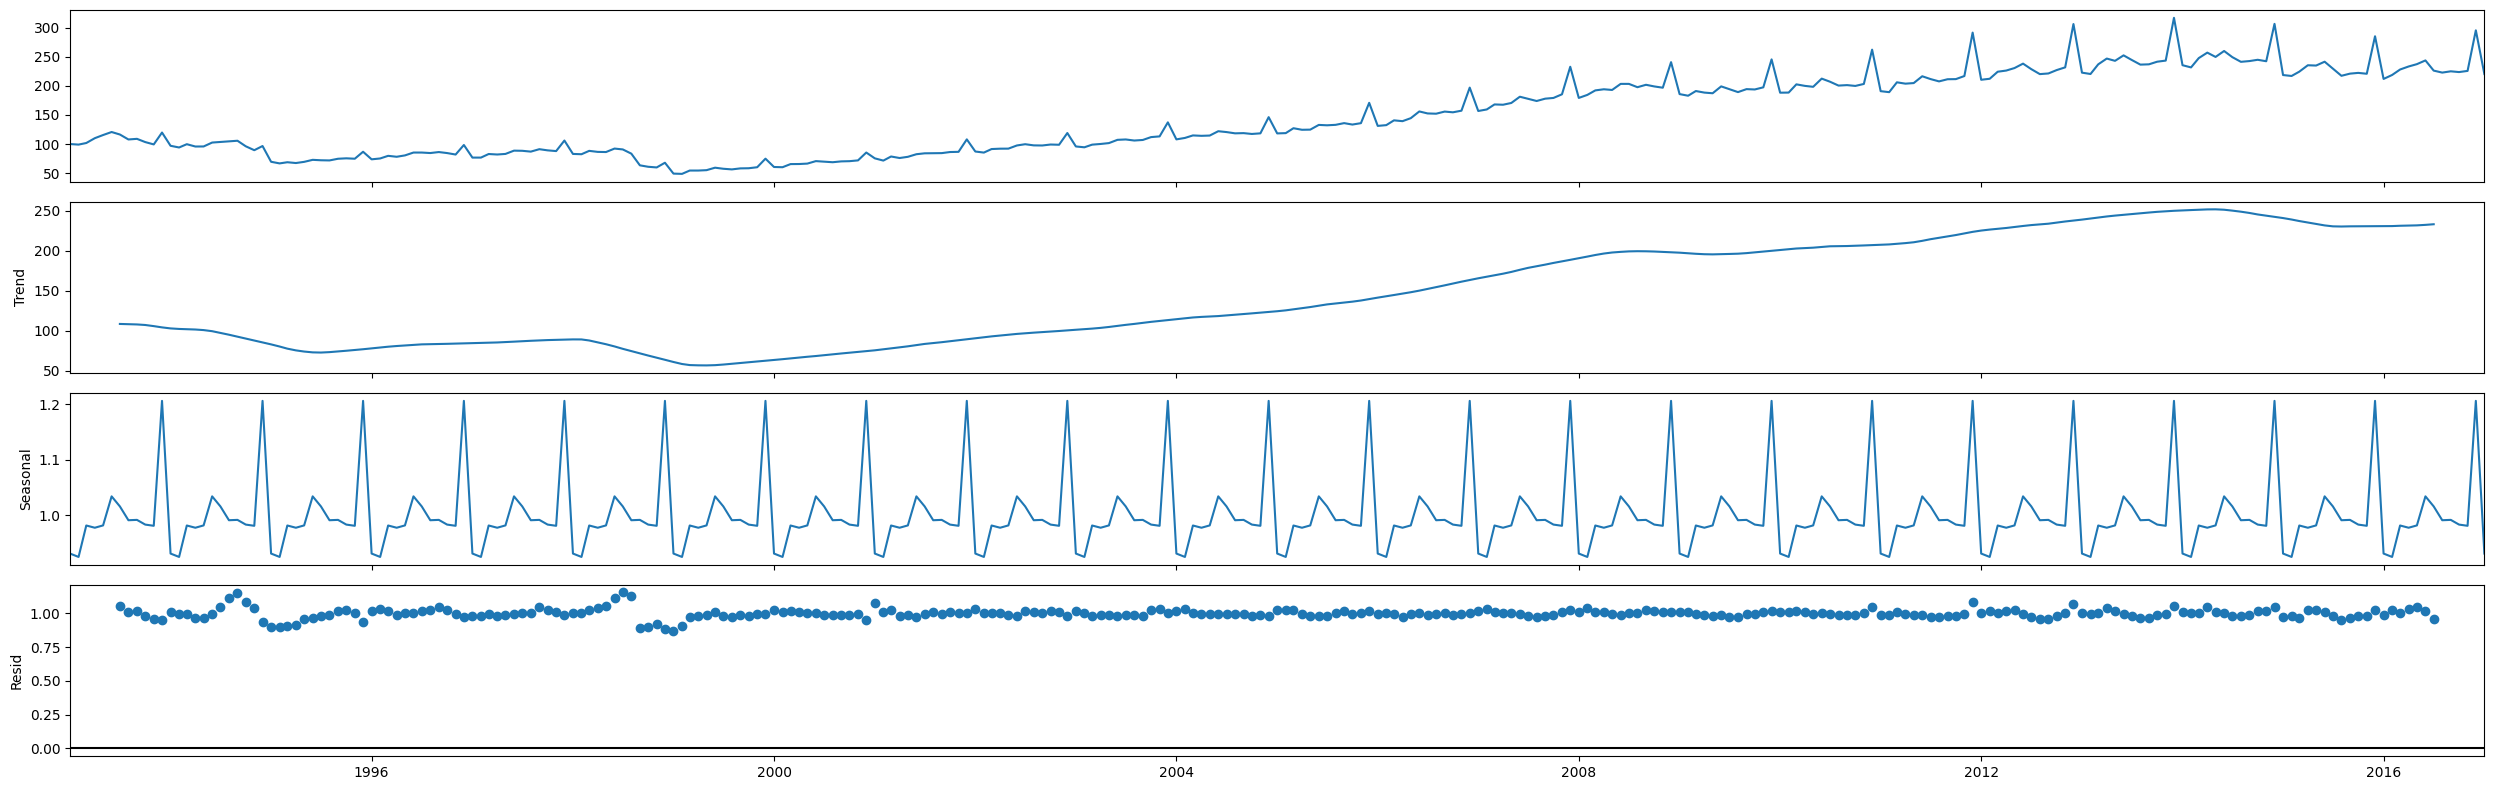

In [ ]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(ts_wage, model='multiplicative')
plt.rc("figure", figsize=(25,8))
resplot = res.plot()

* Оценка тренда

Тренд вычисляется скользящим средним (moving average) с окном, равным длине сезонного периода (period).
Если period четное, усредняется два соседних значения, чтобы центрировать тренд.


* Оценка сезонной компоненты

Вычисляется как среднее значение отклонения от тренда для каждой временной точки в пределах сезонного цикла.
Например, если period=12 (месячные данные с годовой сезонностью), то для каждого месяца вычисляется среднее значение отклонения от тренда.


* Оценка остатков

Остаток вычисляется как разница (в аддитивной модели) или отношение (в мультипликативной модели) между исходными данными и суммой (или произведением) тренда и сезонности.


In [ ]:
ts_wage.index

DatetimeIndex(['1993-01-01', '1993-02-01', '1993-03-01', '1993-04-01',
               '1993-05-01', '1993-06-01', '1993-07-01', '1993-08-01',
               '1993-09-01', '1993-10-01',
               ...
               '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01',
               '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
               '2016-12-01', '2017-01-01'],
              dtype='datetime64[ns]', name='Timestamp', length=289, freq=None)

Мы видим в ряде выраженные компоненты тренда и сезонности. Значит, он нестационарный.

Проверим это при помощи теста Дики-Фуллера.

In [ ]:
from statsmodels.tsa import stattools

df_stat = stattools.adfuller(ts_wage)

print('The Augmented Dickey-Fuller test statistic %f, \npvalue: %.2f\ncritical values: %s' %
      (df_stat[0], df_stat[1], df_stat[4]))

if df_stat[0] > df_stat[4]['5%']:
    print('Есть единичные корни - ряд нестационарный') # 100% верно
else:
    print('Единичных корней нет (возможно, ряд стационарен)') # не всегда верно

The Augmented Dickey-Fuller test statistic -0.230891, 
pvalue: 0.93
critical values: {'1%': -3.45453261164607, '5%': -2.8721859575020017, '10%': -2.572442854861866}
Есть единичные корни - ряд нестационарный
